# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np
# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Summary_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
                    


# Display the data table for preview
Summary_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count=Summary_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = Summary_df.loc[Summary_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = Summary_df.loc[Summary_df["Mouse ID"] == "g989"]
duplicate_mice_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = Summary_df[Summary_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
clean_data.loc[clean_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
# Checking the number of mice in the clean DataFrame
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
drug_regimen_summary=Summary_df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"]
drug_regimen_summary

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean=drug_regimen_summary=Summary_df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median=drug_regimen_summary=Summary_df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance=drug_regimen_summary=Summary_df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_StDv=drug_regimen_summary=Summary_df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_SEM=drug_regimen_summary=Summary_df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_summary=pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,"Median Tumor Volume":tumor_volume_median,
                                   "Tumor Volume Variance":tumor_volume_variance,"Tumor Volume Std.Dev.":tumor_volume_StDv,
                                   "Tumor Volume Std.Err.":tumor_volume_SEM})
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary_V2= Summary_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_summary_V2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

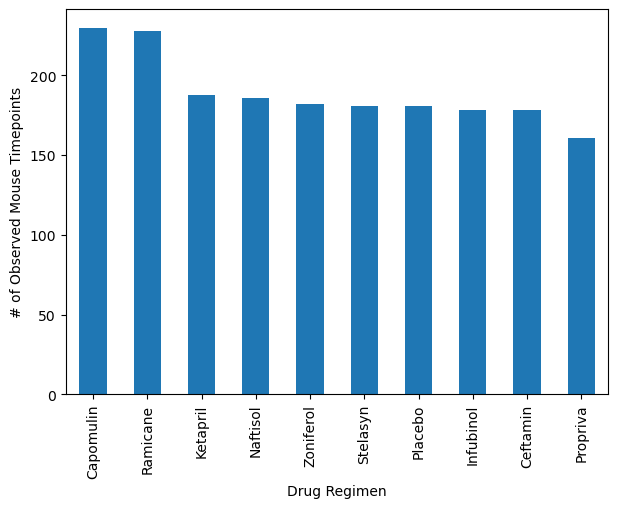

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_rgimen_count = Summary_df["Drug Regimen"].value_counts()


drug_rgimen_count.plot(kind="bar", figsize=(7,5),xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")

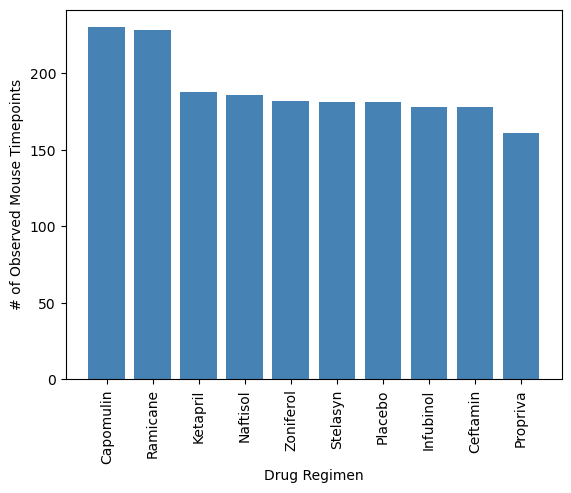

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis =Summary_df["Drug Regimen"].value_counts().index
y_axis=Summary_df["Drug Regimen"].value_counts().values
plt.bar(x_axis,y_axis, color="steelblue", align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

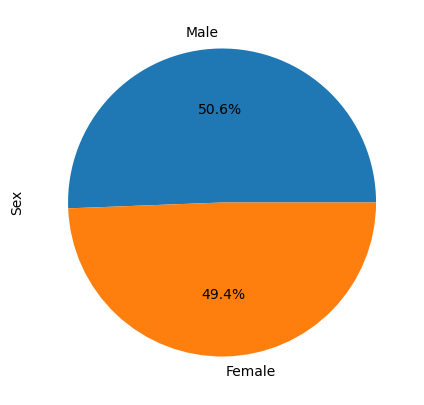

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender= Summary_df["Sex"].value_counts()


mice_gender.plot(kind="pie", figsize=(5,5),y=mice_gender,autopct='%.1f%%')

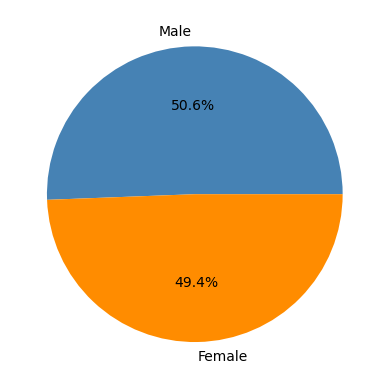

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = Summary_df.groupby('Sex').size()
female_count = gender_counts['Female']
male_count = gender_counts['Male']

labels = ['Male','Female']
pies = [male_count,female_count]
colors = ['steelblue','darkorange']

plt.pie(pies, labels=labels, colors=colors, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = Summary_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastimepoint_tumor_volume = pd.merge(last_timepoint, Summary_df, on=['Mouse ID', 'Timepoint'], how='left')
lastimepoint_tumor_volume=pd.DataFrame(lastimepoint_tumor_volume)
lastimepoint_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens=['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_regimens:
    
    tumor_volumes=lastimepoint_tumor_volume.loc[lastimepoint_tumor_volume["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    # add subset 

    tumor_volume_data.append(tumor_volumes)
    # Determine outliers using upper and lower bounds
    quartiles =tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{drug}'s potential outliers:Series ([{outliers}])")
    print()
  

Capomulin's potential outliers:Series ([Series([], Name: Tumor Volume (mm3), dtype: float64)])

Ramicane's potential outliers:Series ([Series([], Name: Tumor Volume (mm3), dtype: float64)])

Infubinol's potential outliers:Series ([31    36.321346
Name: Tumor Volume (mm3), dtype: float64])

Ceftamin's potential outliers:Series ([Series([], Name: Tumor Volume (mm3), dtype: float64)])



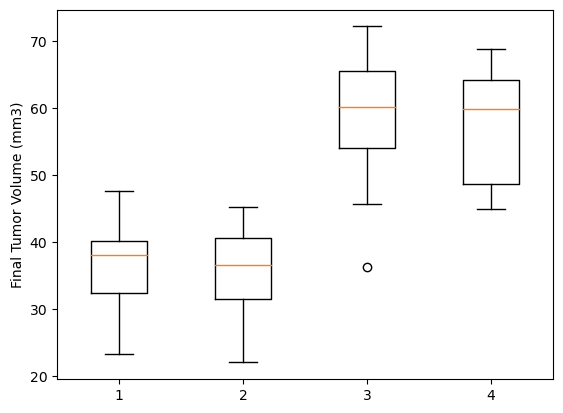

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data)
plt.show()

## Line and Scatter Plots

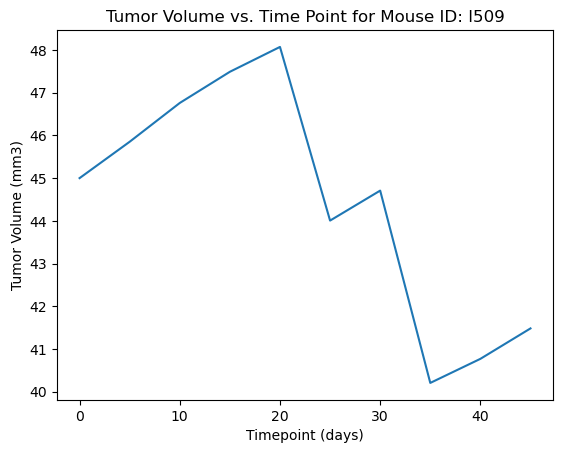

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'


filtered_data = Summary_df[(Summary_df['Mouse ID'] == mouse_id) & (Summary_df['Drug Regimen'] == 'Capomulin')]


plt.plot(filtered_data['Timepoint'], filtered_data['Tumor Volume (mm3)'])


plt.title('Tumor Volume vs. Time Point for Mouse ID: ' + mouse_id)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()



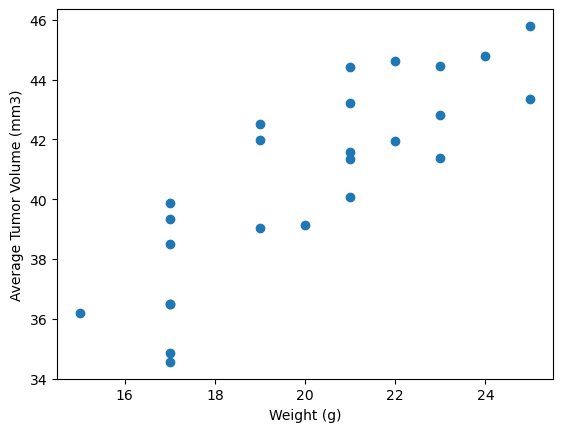

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = Summary_df[Summary_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plot=plt.scatter(mouse_weight, avg_tumor_volume)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


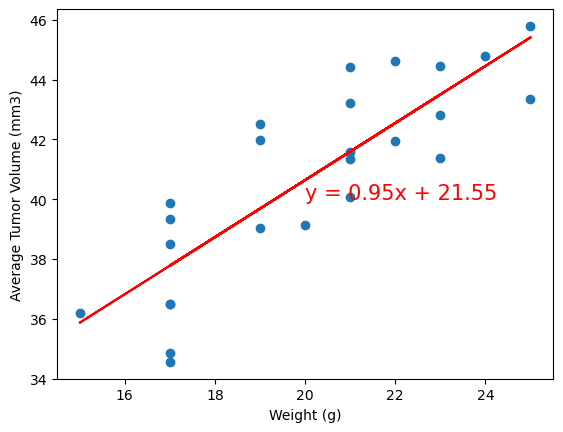

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor_volume)[0],2)}")

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
